## **Data Cleaning and Preprocessing**

In [1]:
# NLP + ML Libraries
import pandas as pd

import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download("stopwords")
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Re-load the uploaded datasets
train_df = pd.read_csv("twitter_training.csv", header=None)
valid_df = pd.read_csv("twitter_validation.csv", header=None)

In [3]:
train_df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
train_df.shape

(74682, 4)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       74682 non-null  int64 
 1   1       74682 non-null  object
 2   2       74682 non-null  object
 3   3       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
train_df.columns

Index([0, 1, 2, 3], dtype='int64')

In [7]:
# Rename columns for clarity
train_df.columns = ["Tweet_ID", "Topic", "Sentiment", "Tweet"]
valid_df.columns = ["Tweet_ID", "Topic", "Sentiment", "Tweet"]

In [8]:
# Filter out 'Irrelevant' sentiment
train_df = train_df[train_df["Sentiment"] != "Irrelevant"]

In [9]:
# Function to clean tweet text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'\@[\w]+|\#[\w]+', '', text)  # remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove digits
    tokens = text.split()
    stop_words = set(stopwords.words("english"))
    tokens = [w for w in tokens if w not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(w) for w in tokens]
    return " ".join(tokens)

In [10]:
# Replace NaNs with empty strings and ensure all tweets are strings
train_df["Tweet"] = train_df["Tweet"].fillna("").astype(str)

/tmp/ipython-input-10-314967846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Tweet"] = train_df["Tweet"].fillna("").astype(str)


In [11]:
# Applying cleaning to tweets
train_df["Clean_Tweet"] = train_df["Tweet"].apply(clean_text)

In [12]:
# Feature extraction using Bag-of-Words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train_df["Clean_Tweet"])
y = train_df["Sentiment"]

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Model training and evaluation**

In [14]:
# Train Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [15]:
# Predictions and Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7558148958586596

Classification Report:
               precision    recall  f1-score   support

    Negative       0.73      0.84      0.78      4509
     Neutral       0.82      0.61      0.70      3650
    Positive       0.75      0.80      0.77      4180

    accuracy                           0.76     12339
   macro avg       0.76      0.75      0.75     12339
weighted avg       0.76      0.76      0.75     12339



## **Visualizations**

/tmp/ipython-input-16-30845735.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x="Sentiment", order=train_df["Sentiment"].value_counts().index, palette="Set2")


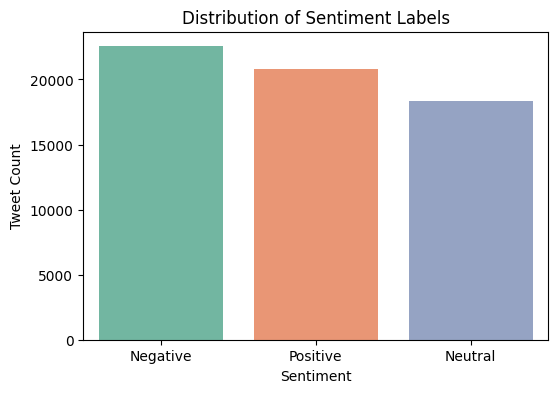

In [16]:
# Sentiment Distribution (Bar Plot)

plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x="Sentiment", order=train_df["Sentiment"].value_counts().index, palette="Set2")
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

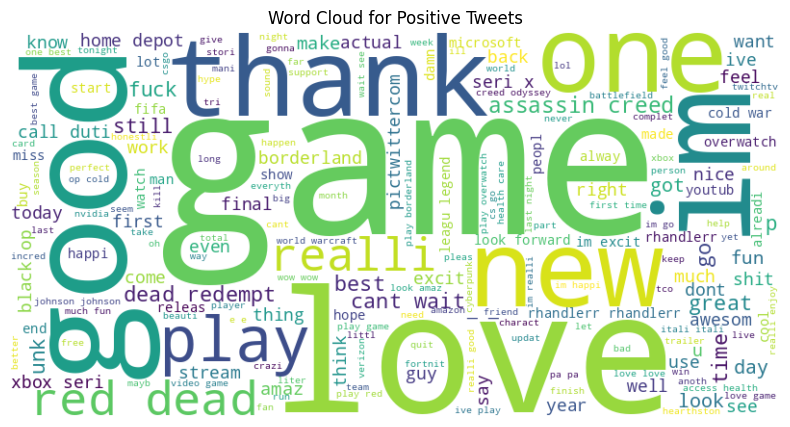

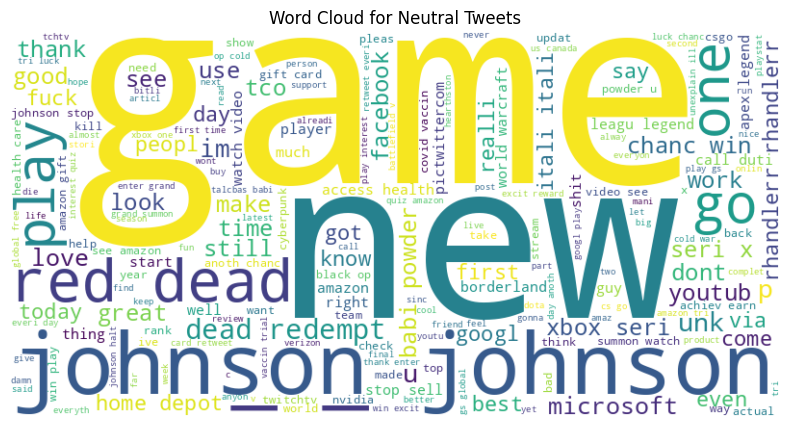

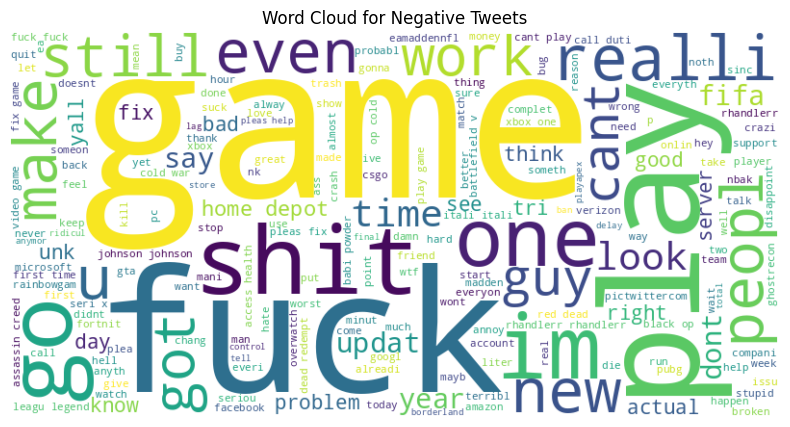

In [17]:
# Word Cloud per Sentiment (Top Words Visual)
from wordcloud import WordCloud

for sentiment in train_df["Sentiment"].unique():
    text = " ".join(train_df[train_df["Sentiment"] == sentiment]["Clean_Tweet"])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment} Tweets")
    plt.show()


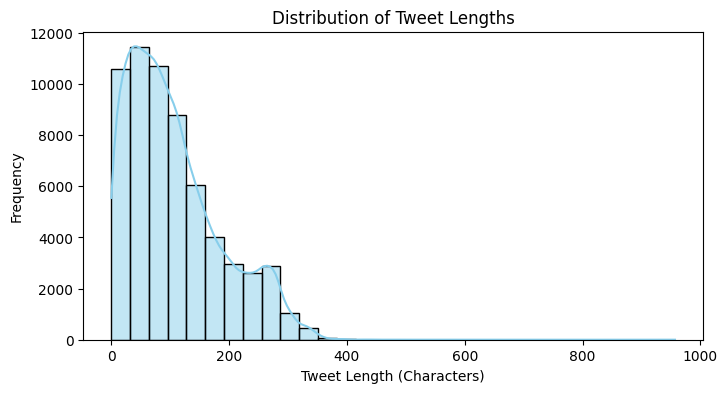

In [18]:
# Tweet Length Distribution

train_df["Tweet_Length"] = train_df["Tweet"].apply(lambda x: len(x))

plt.figure(figsize=(8, 4))
sns.histplot(data=train_df, x="Tweet_Length", bins=30, kde=True, color='skyblue')
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Tweet Length (Characters)")
plt.ylabel("Frequency")
plt.show()


/tmp/ipython-input-19-1298915561.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_df, x="Frequency", y="Word", palette="viridis")


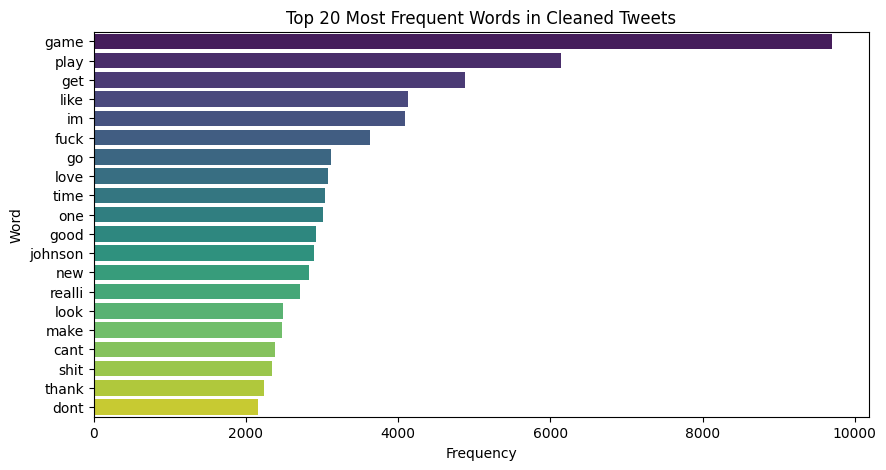

In [19]:
# Most Common Words

from collections import Counter
import itertools

# Tokenize all clean tweets
all_words = " ".join(train_df["Clean_Tweet"]).split()
word_freq = Counter(all_words).most_common(20)

# Convert to DataFrame
word_df = pd.DataFrame(word_freq, columns=["Word", "Frequency"])

plt.figure(figsize=(10, 5))
sns.barplot(data=word_df, x="Frequency", y="Word", palette="viridis")
plt.title("Top 20 Most Frequent Words in Cleaned Tweets")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

<Figure size 600x500 with 0 Axes>

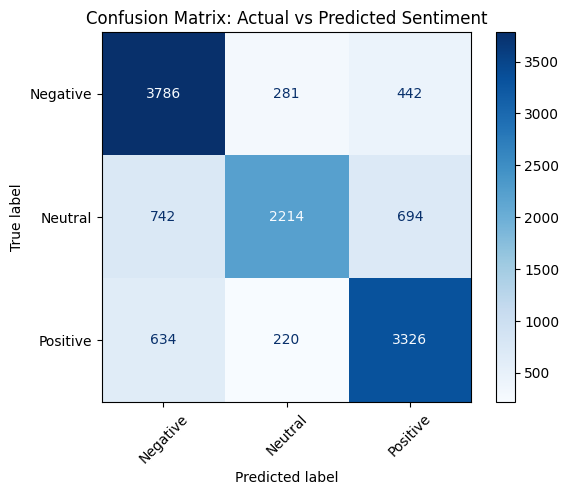

In [20]:
# Confusion Matrix (Actual vs Predicted)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix: Actual vs Predicted Sentiment")
plt.show()


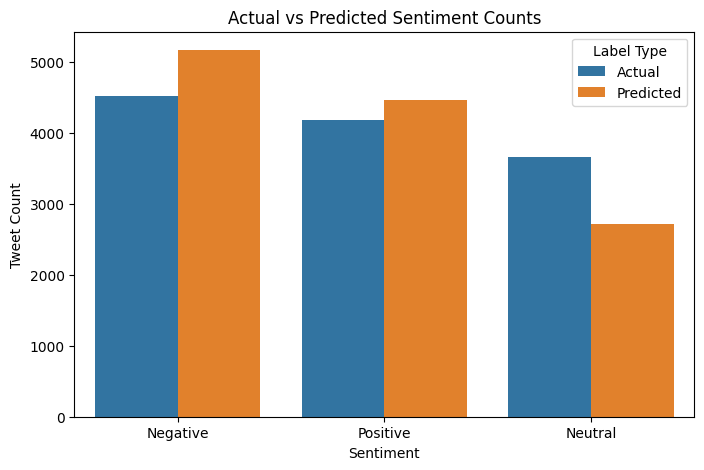

In [21]:
# Side-by-Side Count Plot

compare_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

# Melt to long format
melted_df = compare_df.reset_index().melt(id_vars="index", value_vars=["Actual", "Predicted"], var_name="Type", value_name="Sentiment")

plt.figure(figsize=(8, 5))
sns.countplot(data=melted_df, x="Sentiment", hue="Type", order=train_df["Sentiment"].value_counts().index)
plt.title("Actual vs Predicted Sentiment Counts")
plt.ylabel("Tweet Count")
plt.xlabel("Sentiment")
plt.legend(title="Label Type")
plt.show()
